<a href="https://colab.research.google.com/github/kaushikaryaman2001/Aryaman/blob/master/NEO_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Importing the required libraries for EDA


In [3]:
#Importing Libraries and DATASETS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [80]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


##1.1 Loading data into data the data frame

In [478]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [479]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [480]:
df.tail(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11904,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000
11905,BMW,Z8,2003,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,131500
11906,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46020
11907,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


##1.2Checking the types of data and basic summary stats

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [482]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [483]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [484]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [485]:
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


##2. Dropping irrelevant columns

This step is important as sometimes there would be columns that we never use and are not useful in predicting our dependent variable i.e. target variable .So, we drop those columns from aur dataframe.
Here two Columns are not need "Market

In [486]:
df = df.drop(['Number of Doors','Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


##3. Renaming the columns

Sometimes, column names can be confusing or not readable, so its a good practice to rename column names as it improves the readability of the data set.

In [487]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


##4. Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data, so here we remove all the duplicate value from the data-set.

In [488]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (721, 14)


In [489]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


##4.1 Imputing Missing Values

In the steps it has given to drop missing values but in my perspective I don't think droping missing values is the good decision ,rather we can inpute them using mean, median ,mode functions .

In [490]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

In [491]:
df["HP"].fillna(df["HP"].mean(),inplace=True)
df["Cylinders"].fillna(df["Cylinders"].mode()[0],inplace=True)

In [492]:
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    3
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

In [493]:
df["Engine Fuel Type"].value_counts()

regular unleaded                                6652
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [494]:
df["Engine Fuel Type"].fillna(df["Engine Fuel Type"].mode()[0],inplace=True)

In [495]:
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

All the missing Values are treated with some function.

##5. Detecting Outliers
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.


In [496]:
df.dtypes

Make                 object
Model                object
Year                  int64
Engine Fuel Type     object
HP                  float64
Cylinders           float64
Transmission         object
Drive Mode           object
Vehicle Size         object
Vehicle Style        object
MPG-H                 int64
MPG-C                 int64
Popularity            int64
Price                 int64
dtype: object

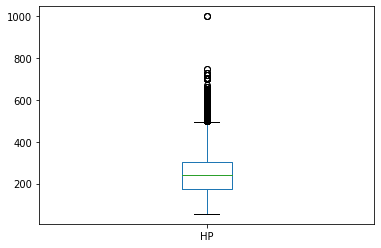

In [497]:
df["HP"].plot.box()

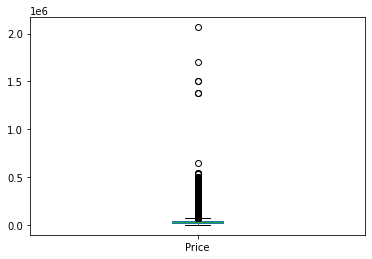

In [498]:
df["Price"].plot.box()

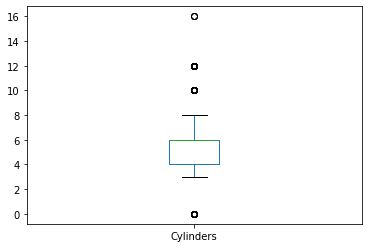

In [499]:
df["Cylinders"].plot.box()

In [500]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              131.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21440.0
dtype: float64


In [501]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8641, 14)

##6. What are the most represented car brands ?

In [502]:
df_top10=df["Make"].value_counts()[:10]
df_top10

Chevrolet     1034
Toyota         629
Volkswagen     515
Nissan         513
GMC            469
Dodge          425
Mazda          397
Honda          373
Suzuki         339
Infiniti       322
Name: Make, dtype: int64

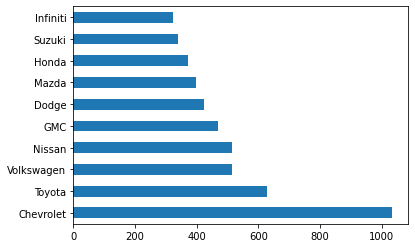

In [503]:
df_top10.plot.barh()

In [504]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28252.488395
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20830.670025
Nissan      28352.543860
Toyota      29011.750397
Volkswagen  29032.817476


##Correlation Matrix

In [505]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330508,-0.092900,0.359710,0.323573,0.204511,0.592328
HP,0.330508,1.000000,0.740039,-0.464647,-0.562411,0.105895,0.742783
Cylinders,-0.092900,0.740039,1.000000,-0.695076,-0.747771,0.027074,0.391885
MPG-H,0.359710,-0.464647,-0.695076,1.000000,0.937950,0.081968,-0.127234
MPG-C,0.323573,-0.562411,-0.747771,0.937950,1.000000,0.071769,-0.201798
Popularity,0.204511,0.105895,0.027074,0.081968,0.071769,1.000000,0.115812
Price,0.592328,0.742783,0.391885,-0.127234,-0.201798,0.115812,1.000000


**High** Correlation between 
1. Cylinders and HP
2.highway mpg and city mpg

below are the graphs to prove this 

High Anticorrelation :

cylinders and highway mpg


Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.


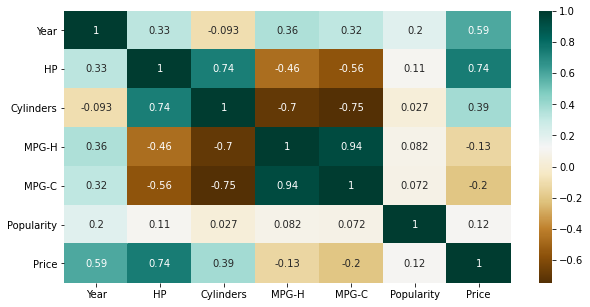

In [506]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [507]:
df.dtypes


Make                 object
Model                object
Year                  int64
Engine Fuel Type     object
HP                  float64
Cylinders           float64
Transmission         object
Drive Mode           object
Vehicle Size         object
Vehicle Style        object
MPG-H                 int64
MPG-C                 int64
Popularity            int64
Price                 int64
dtype: object

In [508]:
df["Cylinders"].value_counts()


4.0    3739
6.0    3566
8.0    1183
5.0     151
3.0       2
Name: Cylinders, dtype: int64

There are large no of cars having 4 and 6 cyclinders in comaprision with 8,5,3.


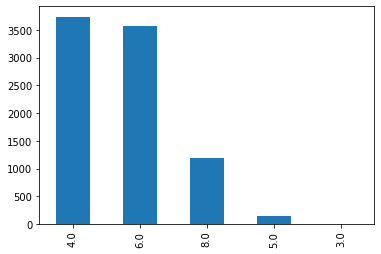

In [509]:
df["Cylinders"].value_counts().plot.bar()

41% of the vehicle are having FWD i.e. Front wheel drive

In [510]:
df["Drive Mode"].value_counts()/len(df)*100

front wheel drive    41.951163
rear wheel drive     25.066543
all wheel drive      21.178104
four wheel drive     11.804189
Name: Drive Mode, dtype: float64

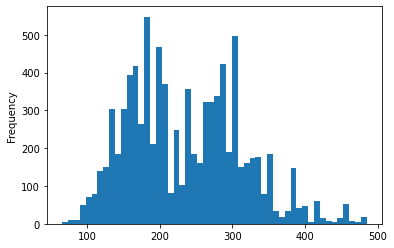

In [511]:
df["HP"].plot.hist(bins=52)

In [512]:

#df["HP"]=df.loc[df["HP"]<380,"HP"]


**TOP 10 COMPANIES HAVING LARGE NO OF CARS MAKE **

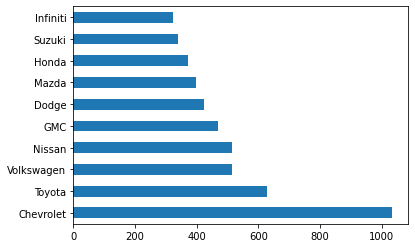

In [513]:
df["Make"].value_counts()[:10].plot.barh()

In [514]:
df["Price"].value_counts().head(10)

2000     312
29995     17
20995     15
21995     14
25995     14
30995     13
24995     13
23995     12
27995     10
43950     10
Name: Price, dtype: int64

From the Value counts of price we can see that there are  around 312 cars having price 2000 which cannot be possible as no car can cost this much of low price ..There is some mistake in taking data 

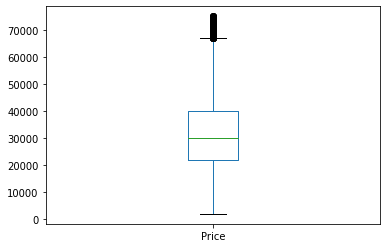

In [515]:
df.Price.plot.box()

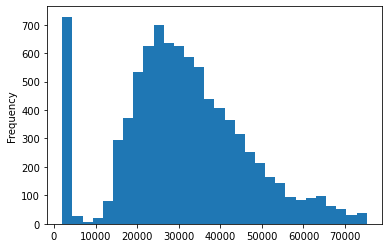

In [516]:
df.Price.plot.hist(bins=30)

In [517]:
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

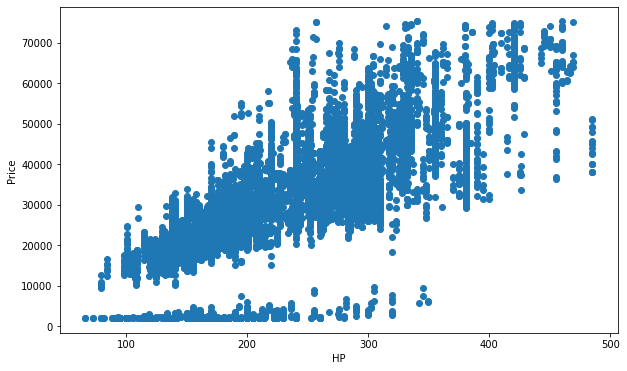

In [518]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

# Which is most in the segment??


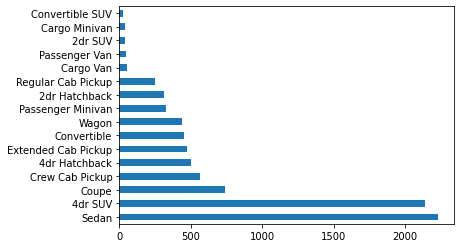

In [519]:
df["Vehicle Style"].value_counts().plot.barh()

From the above bar Graph ,Sedan and 4dr SUV segments are very popular

##Making a New group "Price_group"

In [520]:
# Create a new column 'Price_group' and assign the value based on car price
df['price_group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['price_group'] = df['price_group'].astype(object)

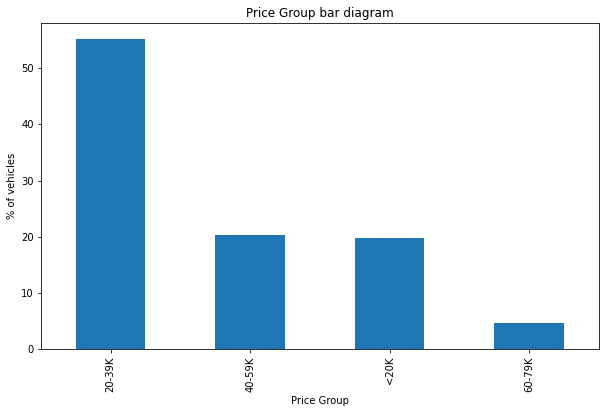

In [521]:
(df['price_group'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

##LINEAR REGRESSION MODEL


In [522]:
x = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']]
y=df["Price"]

In [523]:
## Importing the StandarScaler

## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [524]:
x = pd.DataFrame(x_scaled, columns = x.columns)

###Train Test Split 

In [525]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x,y, test_size = 0.2, random_state = 0)
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((6912, 6), (1729, 6), (6912,), (1729,))

In [526]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
train_x.isnull().sum()

Popularity    0
Year          0
HP            0
Cylinders     0
MPG-H         0
MPG-C         0
dtype: int64

In [527]:
lreg = LinearRegression()
lreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

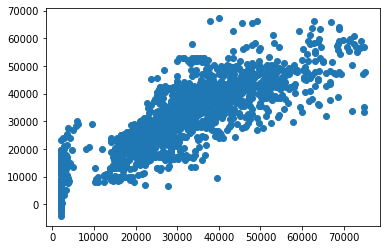

In [531]:
y_pred = lreg.predict(valid_x)
plt.scatter(valid_y,y_pred)
#pred_train = lreg.predict(train_x)

#train_score = np.sqrt(mean_squared_log_error(train_y,pred_train))
#train_score

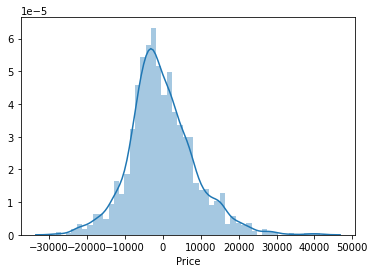

In [534]:
sns.distplot((valid_y-y_pred),bins=50)

In [536]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(valid_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))
print('R2 Score:', metrics.r2_score(valid_y, y_pred))

Mean Absolute Error: 6567.412101282773
Root Mean Squared Error: 8620.59339944602
R2 Score: 0.6698664971117472


In [ ]:
pred_test = lreg.predict(valid_x)
valid_score=np.sqrt(mean_squared_log_error(valid_y,pred_test))
valid_score

##10.Checking ALgorithms

In [540]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(train_x)
poly_reg.fit(X_poly, train_y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

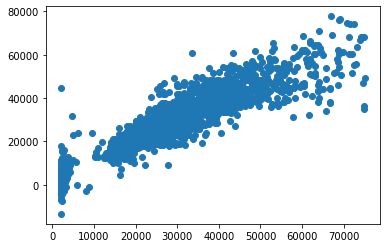

In [543]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(valid_x))
plt.scatter(valid_y,y_pred)

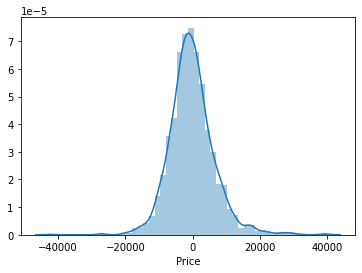

In [545]:
sns.distplot((valid_y-y_pred),bins=50)

In [548]:
print('Mean Absolute Error:', metrics.mean_absolute_error(valid_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))
print('R2 Score:', metrics.r2_score(valid_y, y_pred))

Mean Absolute Error: 4931.288230657161
Root Mean Squared Error: 6743.7656638148665
R2 Score: 0.7979679742737349


In [549]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
lreg = SVR(kernel = 'rbf')
lreg.fit(train_x, train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

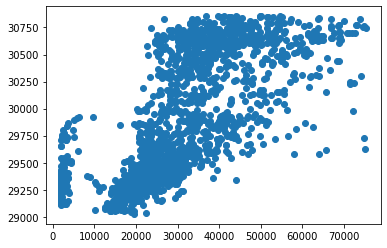

In [552]:
# Predicting a new result
y_pred = lreg.predict(valid_x)
plt.scatter(valid_y,y_pred)

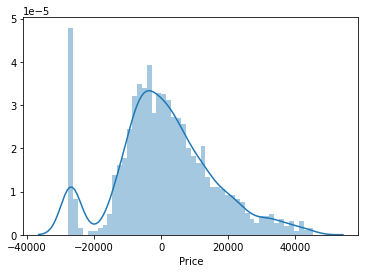

In [555]:
sns.distplot((valid_y-y_pred),bins=50)

In [557]:
print('Mean Absolute Error:', metrics.mean_absolute_error(valid_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))
print('R2 Score:', metrics.r2_score(valid_y, y_pred))

Mean Absolute Error: 11129.750363193676
Root Mean Squared Error: 14660.38126266086
R2 Score: 0.045214518253241076
